In [79]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [80]:
class AbstractPlate(ABC):
    
    def __init__(self, l = 1, N = 100):
        
        # constantes:
        self.length    = l     # comprimento da barra [m]
        self.divisions = N     # número de divisões do domínio

        # vetor usado para a plotagem:
        self.x_coords = np.linspace(0.0, self.length, N + 1)
        self.temps    = np.zeros(N + 1)

        self.delta_x = self.length / N
        self.delta_t = pow(self.delta_x, 2) * 0.2
        self.cte     = self.delta_t / pow(self.delta_x, 2)

    @abstractmethod
    def set_inicial_cond(self) -> None:
        pass
 
    # efetua a mudança de temp.:
    def change_temp(self, k_final):
        prev = self.temps
        for k in range(1, k_final + 1):
            for i in range(1, N):
                self.temps[i] += self.cte * prev[i + 1]
                self.temps[i] += self.cte * prev[i - 1]
                self.temps[i] -= self.cte * prev[i] * 2
            prev = np.copy(self.temps)
        
        self.current_time = k * self.delta_t
    
    # exibe o perfil de temperatura:
    def show(self):
        fig = plt.figure()
        fig.suptitle('t = %.3f'%self.current_time, fontsize = 18, fontweight = 'bold')

        profile = fig.add_subplot()
        profile.grid(True)

        profile.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
        profile.set_xlabel('$x$ $[m]$', fontsize = 18)

        plt.plot(self.x_coords, self.temps, '-r', lw = 4)
        plt.savefig('figura-1.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')

***
### Perfil do código de ref.:

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


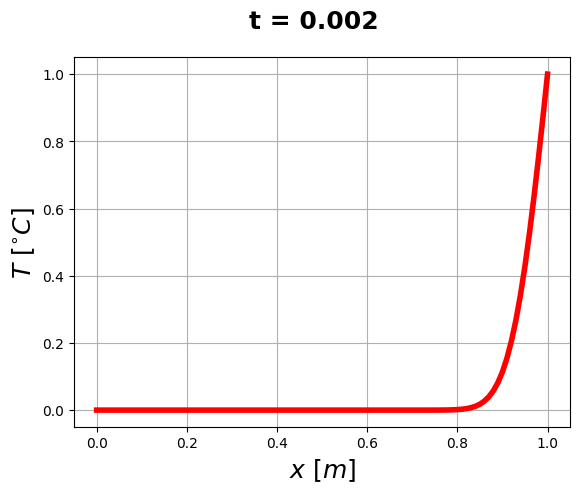

In [81]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 0
        self.temps[N] = Temp_il             # T(L,t) = 1

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "1"
}

exe = Bar()
exe.set_inicial_cond(**boundaries)
exe.change_temp(100)
exe.show()

print("delta x: ", exe.delta_x,
    "\ndelta t: ", exe.delta_t,
    "\ncte    : ", exe.cte)

***
### Proposta:

Apresente a solução de cada problema em diferentes instantes de tempo (escolha pelo menos 4 instantes de tempo para cada caso: um no começo, dois intermediários e um representando o regime permanente, ou seja, para $t$ grande). Comente o que acontece com o perfil de temperatura quando $t\to \inf$. É o esperado? Compare a solução em cada tempo com a solução analítica. Resolva com diferentes valores de $\Delta x$ e compare os resultados. Em todos os problemas deve ser analisada também a dependência da solução com o tamanho do $\Delta x$ e do $\Delta t$ escolhidos. Atenção: devemos ter sempre $\Delta t < \frac{\Delta x^{2}}{2}$. O que acontece quando essa condição não é obedecida? Faça alguns testes. Investigue também qual é a influência de alpha na solução. Os códigos desenvolvidos devem ser enviados separadamente.

### Solução numérica - Problema 1:

Condições de contorno:
- $T(0,t) = 0$
- $T(L,t) = 0\\$
  para $t\ge 0$
- $T(x,0) = 1\\$
  para $0 < x < L$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


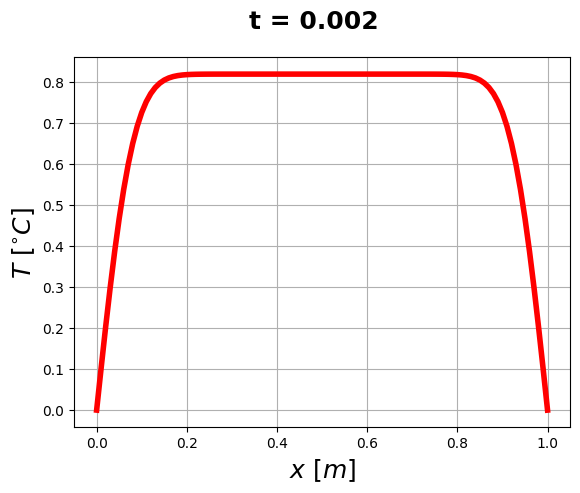

In [82]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições iniciais:
        T_boundary = np.ones(N + 1)         # T(x,0) = 1
        
        # impondo as condições de contorno:
        T_boundary[0] = Temp_i0             # T(0,t) = 0
        T_boundary[N] = Temp_il             # T(L,t) = 0
        self.temps = np.copy(T_boundary)

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

bar = Bar()
bar.set_inicial_cond(**boundaries)
bar.change_temp(100)
bar.show()

print("delta x: ", bar.delta_x,
    "\ndelta t: ", bar.delta_t,
    "\ncte    : ", bar.cte)

***
### Solução numérica - Problema 2:

Condições de contorno:
- $T(0,t) = 1$
- $T(L,t) = 0\\$
  para $t\ge 0$
- $T(x,0) = 0\\$
  para $0 < x < L$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


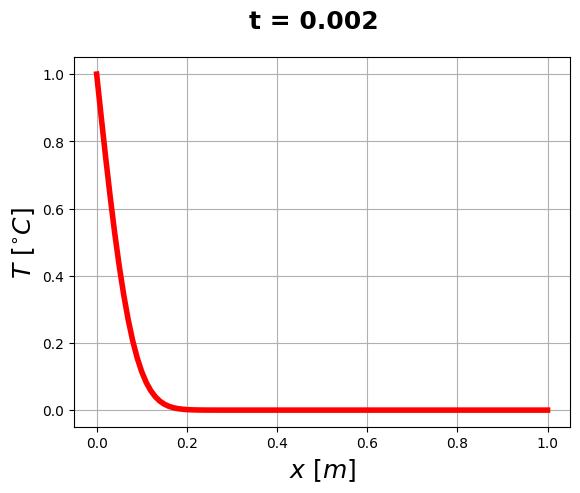

In [83]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 1
        self.temps[N] = Temp_il             # T(L,t) = 0
        
# condições de contorno:
boundaries = {
    "Temp_i0" : "1",
    "Temp_il" : "0"
}

sec_bar = Bar()
sec_bar.set_inicial_cond(**boundaries)
sec_bar.change_temp(100)
sec_bar.show()

print("delta x: ", sec_bar.delta_x,
    "\ndelta t: ", sec_bar.delta_t,
    "\ncte    : ", sec_bar.cte)

***
### Solução numérica - Problema 3:

Condições de contorno:
- $T(0,t) = 0$
- $T(L,t) = 0\\$
  para $t \ge 0$
- $T(x,0) = sin(\frac{\pi\cdot x}{2})\\$
  para $0 < x < L$

delta x:  0.02 
delta t:  8e-05 
cte    :  0.2


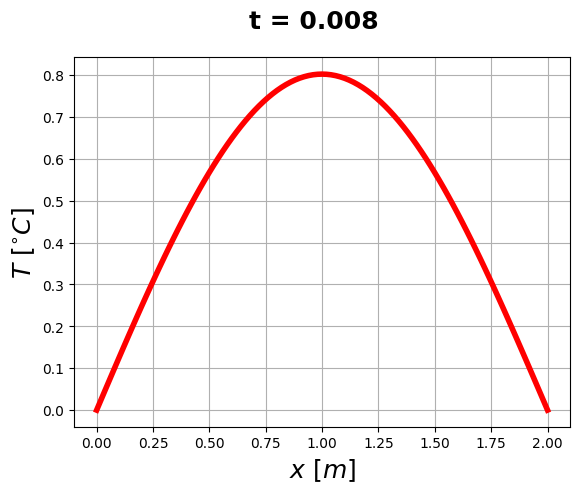

In [87]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:

        # impondo as condições iniciais:
        # T(0,t) = T(L,t) = 0
        T_boundary = np.copy(self.temps)
        for i in range(self.divisions):
            x = i * self.delta_x
            T_boundary[i] = np.sin(np.pi * x / 2) # T(x,0) = sin(pi*x/2)
        
        self.temps = np.copy(T_boundary)

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

# L = 2:
thr_bar = Bar(l = 2)
thr_bar.set_inicial_cond(**boundaries)
thr_bar.change_temp(100)
thr_bar.show()

print("delta x: ", thr_bar.delta_x,
    "\ndelta t: ", thr_bar.delta_t,
    "\ncte    : ", thr_bar.cte)

***
### Codigo para a solução númerica da condução de calor 2D:

Condições de contorno:
- Aquecida na superfície de cima
- Resfriada nas superfícies laterais e inferiores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N_x = 10
N_y = 10
k_final = 1000
L = 1.0

x = np.linspace(0.0, L, N_x + 1) # Vetor x, usado para plotar

delta_x = L/N_x
delta_y = L/N_y
delta_t = 0.2 * delta_x * delta_x

Temp = np.zeros((N_x + 1, N_y + 1), float)

#Condições de contorno:
for i in range(N_x + 1):
    Temp[0][i] = 100.0    # Temperatura superior
# print(Temp)
Temp_nova = np.copy(Temp)

for k in range(1, k_final + 1):
    for i in range(1, N_x):
        for j in range(1, N_y):
            Temp_nova[j][i] += (delta_t/(delta_x*delta_x)) * (Temp[j][i+1] - 2.0*Temp[j][i] + Temp[j][i-1])     #Resolve Para x
            Temp_nova[j][i] += (delta_t/(delta_y*delta_y)) * (Temp[j+1][i] - 2.0*Temp[j][i] + Temp[j-1][i])     #Resolve para y
        Temp = np.copy(Temp_nova)
print(Temp)

# Inserir abaixo o codigo para plotar o grafico 3D